In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [48]:
#place holder until we get dataset ready

data = pd.read_csv("pollution_income_race.csv")

data["AQI Binary"] = 1 * (data["AQI Total"] <= 100)

#our labels are the AQI Binary for now
y = data.loc[:,"AQI Binary"]

#also going to drop states and cities for now, (and city) because we don't get a numerical from that
data = data.drop(columns=["State_x", "County_x", "City", "State_y", "County_y", "AQI Total", "AQI Binary"])

#train and test data
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=42)

In [49]:
#feature importance
X_train

,State Code,County Code,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,...,White Alone (F) %,Black Alone (M) %,Black Alone (F) %,Am Indian+AK Native Alone (M) %,Am Indian+AK Native Alone (F) %,Asian Alone (M) %,Asian Alone (F) %,Nat. HI and PI (M) %,Nat. HI and PI (F) %,TOM_MALE
672,20,107,2003,4.187609,8.494048,10.050595,8.095238,0.030758,0.043634,10.148810,...,0.465733,0.005602,0.003492,0.004080,0.004011,0.001383,0.002490,0.000104,0.000173,0.012414
1070,42,11,2002,17.060246,33.268182,11.790909,31.386364,0.028776,0.049377,10.286364,...,0.437294,0.039629,0.037528,0.004895,0.004756,0.007500,0.008674,0.001086,0.001086,0.015858
1244,45,19,2007,2.030434,5.201320,7.366337,5.079208,0.032382,0.042756,9.910891,...,0.355457,0.118822,0.137157,0.002137,0.002001,0.008919,0.010407,0.000466,0.000468,0.008841
1195,42,125,2001,12.726527,26.797170,13.066038,25.268868,0.028264,0.051887,10.405660,...,0.471629,0.017951,0.015601,0.001021,0.000842,0.005774,0.006241,0.000129,0.000161,0.010019
771,24,33,2013,8.297710,17.566357,10.308527,16.114729,0.025166,0.037696,10.282171,...,0.129156,0.298892,0.343182,0.006765,0.006064,0.021272,0.022735,0.001156,0.001103,0.013367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,42,17,2011,8.850884,20.156997,10.767918,19.017065,0.025065,0.038908,10.368601,...,0.442409,0.022901,0.023377,0.001580,0.001407,0.026174,0.028250,0.000328,0.000372,0.009748
1130,42,49,2016,5.870183,14.965318,12.080925,14.092486,0.030331,0.036538,10.947977,...,0.439812,0.041937,0.037242,0.001525,0.001380,0.010380,0.010344,0.000284,0.000420,0.012884
1294,48,141,2007,12.381306,28.603293,12.344311,27.017964,0.029382,0.043689,9.971557,...,0.463569,0.023895,0.017510,0.005685,0.005279,0.006777,0.007391,0.001190,0.001112,0.007929
860,34,7,2003,20.120132,35.616935,11.725806,33.673387,0.025423,0.039960,10.201613,...,0.348684,0.102185,0.116036,0.003474,0.003493,0.029252,0.031900,0.000579,0.000583,0.013459


In [50]:
y_train

#making y_train into categorical (good, bad) for now. 1 is good, 0 is worst
#using threshold from epa.gov: 100 and below gets 1, 101 and above gets 0


672     1
1070    0
1244    1
1195    0
771     1
       ..
1095    1
1130    1
1294    1
860     0
1126    1
Name: AQI Binary, Length: 943, dtype: int64

In [51]:
X_train.columns.values.tolist()

['State Code',
 'County Code',
 'Date Local',
 'NO2 Mean',
 'NO2 1st Max Value',
 'NO2 1st Max Hour',
 'NO2 AQI',
 'O3 Mean',
 'O3 1st Max Value',
 'O3 1st Max Hour',
 'O3 AQI',
 'SO2 Mean',
 'SO2 1st Max Value',
 'SO2 1st Max Hour',
 'SO2 AQI',
 'CO Mean',
 'CO 1st Max Value',
 'CO 1st Max Hour',
 'CO AQI',
 'Median Household Income',
 'Total Pop',
 'Total Male %',
 'Total Female %',
 'White Alone (M) %',
 'White Alone (F) %',
 'Black Alone (M) %',
 'Black Alone (F) %',
 'Am Indian+AK Native Alone (M) %',
 'Am Indian+AK Native Alone (F) %',
 'Asian Alone (M) %',
 'Asian Alone (F) %',
 'Nat. HI and PI (M) %',
 'Nat. HI and PI (F) %',
 'TOM_MALE']

In [52]:
data.dtypes

State Code                           int64
County Code                          int64
Date Local                           int64
NO2 Mean                           float64
NO2 1st Max Value                  float64
NO2 1st Max Hour                   float64
NO2 AQI                            float64
O3 Mean                            float64
O3 1st Max Value                   float64
O3 1st Max Hour                    float64
O3 AQI                             float64
SO2 Mean                           float64
SO2 1st Max Value                  float64
SO2 1st Max Hour                   float64
SO2 AQI                            float64
CO Mean                            float64
CO 1st Max Value                   float64
CO 1st Max Hour                    float64
CO AQI                             float64
Median Household Income            float64
Total Pop                            int64
Total Male %                       float64
Total Female %                     float64
White Alone

<BarContainer object of 5 artists>

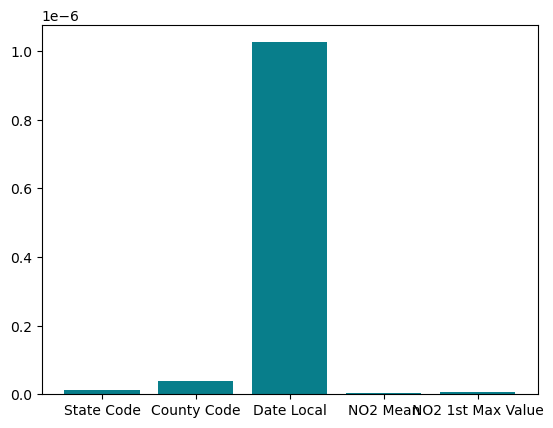

In [70]:
#try feature importance w Logistic Regression
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

LR = LogisticRegression()
LR.fit(X_train, y_train)

#get importance
importances = pd.DataFrame(data = 
                           {'Attribute': X_train.columns,
                            'Importance': LR.coef_[0]
                           })

importances.sort_values('Importance')

importances = importances[0:5]

#plot importance for features
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')

<BarContainer object of 5 artists>

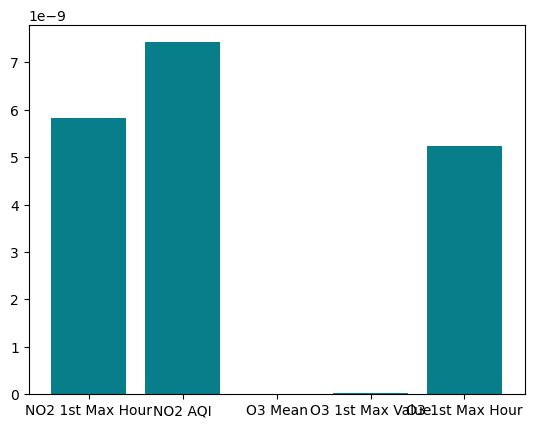

In [72]:
#get importance
importances = pd.DataFrame(data = 
                           {'Attribute': X_train.columns,
                            'Importance': LR.coef_[0]
                           })

importances.sort_values('Importance')

importances = importances[5:10]

#plot importance for features
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')

<BarContainer object of 4 artists>

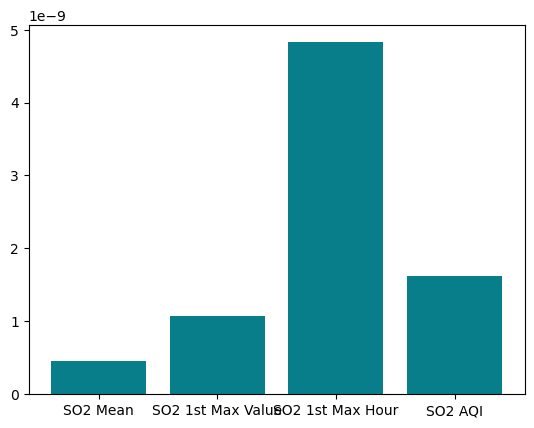

In [73]:
#get importance
importances = pd.DataFrame(data = 
                           {'Attribute': X_train.columns,
                            'Importance': LR.coef_[0]
                           })

importances.sort_values('Importance')

importances = importances[11:15]

#plot importance for features
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')

<BarContainer object of 5 artists>

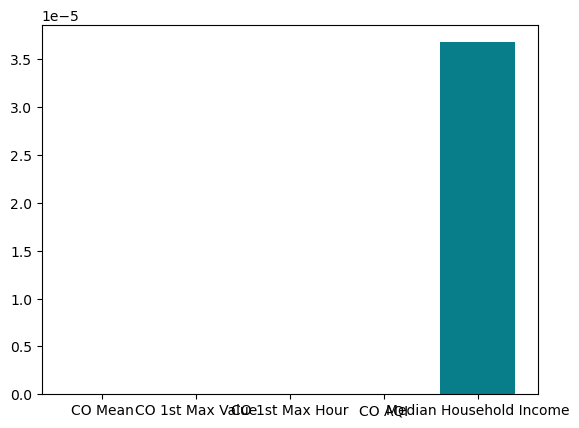

In [74]:
#get importance
importances = pd.DataFrame(data = 
                           {'Attribute': X_train.columns,
                            'Importance': LR.coef_[0]
                           })

importances.sort_values('Importance')

importances = importances[15:20]

#plot importance for features
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')